In [1]:
!pip install opencv-python
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 12.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.1-cp37-cp37m-linux_x86_64.whl size=3729623 sha256=0c69aac73996a35959e98a3aa9485df53342b03871781ff875f9b1fb98df42cd
  Stored in directory: /root/.cache/pip/wheels/be/28/ef/be877f85f9760adadab2a51707ff31c835be8631e38866bad1
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=6c2e2f0ebd3e512b3647ba56489d93566df23c403037b46f77f84fbe98934b7b
  Stored in directory: /root/.cache/pip/wheels/65/cf/0a/4f8e7e42906ede15f4cdf00d6a8f451e4785679155ce17368c
Successfully built dlib face-recognition-models


In [2]:
import numpy as np 
import cv2
import face_recognition
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'face_recognition'

In [3]:
img = cv2.imread(r'/kaggle/input/emotion-detection-fer/test/sad/im0.png')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

(48, 48, 3)


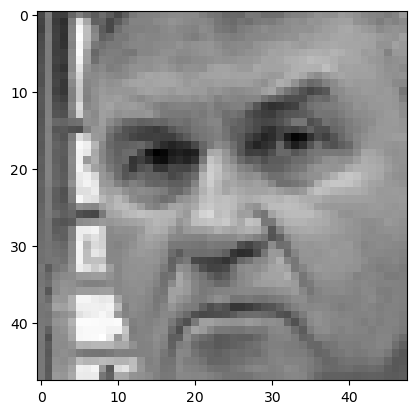

In [4]:
plt.imshow(img1, cmap='gray')

In [5]:
landmarks = face_recognition.face_landmarks(img1)[0]
print(landmarks)

{'chin': [(8, 21), (8, 26), (9, 31), (10, 35), (11, 40), (13, 44), (16, 47), (19, 48), (24, 48), (29, 48), (35, 47), (41, 45), (45, 41), (47, 35), (48, 29), (48, 23), (47, 16)], 'left_eyebrow': [(9, 17), (10, 14), (13, 13), (16, 14), (19, 14)], 'right_eyebrow': [(26, 13), (29, 11), (33, 9), (37, 9), (40, 12)], 'nose_bridge': [(22, 18), (22, 22), (21, 25), (21, 28)], 'nose_tip': [(18, 32), (20, 32), (22, 33), (25, 32), (28, 31)], 'left_eye': [(12, 21), (14, 19), (17, 18), (19, 20), (17, 21), (14, 21)], 'right_eye': [(29, 18), (31, 16), (34, 16), (37, 17), (34, 18), (31, 19)], 'top_lip': [(18, 40), (19, 38), (21, 37), (23, 38), (25, 37), (28, 37), (31, 39), (30, 39), (25, 38), (23, 39), (21, 39), (19, 40)], 'bottom_lip': [(31, 39), (29, 40), (26, 41), (24, 42), (22, 42), (20, 41), (18, 40), (19, 40), (21, 40), (23, 40), (26, 39), (30, 39)]}


In [6]:
for i, v in landmarks.items():
    print(i,v)
    for j in v:
        cv2.circle(img, j, 0, (0,255,255))
cv2.imwrite('face.jpg', img)

chin [(8, 21), (8, 26), (9, 31), (10, 35), (11, 40), (13, 44), (16, 47), (19, 48), (24, 48), (29, 48), (35, 47), (41, 45), (45, 41), (47, 35), (48, 29), (48, 23), (47, 16)]
left_eyebrow [(9, 17), (10, 14), (13, 13), (16, 14), (19, 14)]
right_eyebrow [(26, 13), (29, 11), (33, 9), (37, 9), (40, 12)]
nose_bridge [(22, 18), (22, 22), (21, 25), (21, 28)]
nose_tip [(18, 32), (20, 32), (22, 33), (25, 32), (28, 31)]
left_eye [(12, 21), (14, 19), (17, 18), (19, 20), (17, 21), (14, 21)]
right_eye [(29, 18), (31, 16), (34, 16), (37, 17), (34, 18), (31, 19)]
top_lip [(18, 40), (19, 38), (21, 37), (23, 38), (25, 37), (28, 37), (31, 39), (30, 39), (25, 38), (23, 39), (21, 39), (19, 40)]
bottom_lip [(31, 39), (29, 40), (26, 41), (24, 42), (22, 42), (20, 41), (18, 40), (19, 40), (21, 40), (23, 40), (26, 39), (30, 39)]


True

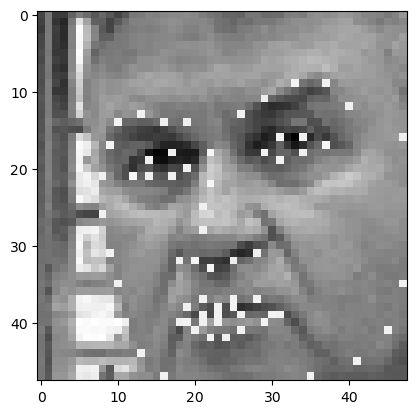

In [7]:
output = cv2.imread(r'/kaggle/working/face.jpg')
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2GRAY), cmap='gray')

In [8]:
def distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return ((x1-x2)**2 + (y1-y2)**2)**.5

In [9]:
def features(image_path):
    img = cv2.imread(image_path)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    landmarks = face_recognition.face_landmarks(img1)
    if len(landmarks) ==0:
        return 0
    else:
        landmarks = landmarks[0]
        points = []
        for i, v in landmarks.items():
            points.extend(v)
        distances = []
        for i in points:
            distances.extend([distance(i, k) for k in points])
        return distances

In [10]:
import os

In [11]:
X_train, X_test, y_train, y_test = ([], [], [], [])
for dirname, _, filenames in os.walk('/kaggle/input/emotion-detection-fer/'):
    for file in filenames:
        if file.endswith('.png'):
            label = dirname.split('/')[-2]
            category = dirname.split('/')[-1]
            feat = features(os.path.join(dirname, file))
            if label == 'test':
                X_test.append([0]*5184 if feat == 0 else feat)
                y_test.append('can not say' if feat == 0 else category)
            else:
                X_train.append([0]*5184 if feat == 0 else feat)
                y_train.append('can not say' if feat == 0 else category)

In [12]:
len(X_test)

7178

In [13]:
len(X_train)

28709

In [14]:
categories = list(set(y_test))
print(categories)

['fearful', 'sad', 'surprised', 'happy', 'disgusted', 'neutral', 'angry', 'can not say']


In [15]:
def labeling(x):
    for i in range(len(x)):
        x[i] = categories.index(x[i])
    return np.array(x)

In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = labeling(y_train)
y_test = labeling(y_test)

In [17]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [18]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [19]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='weighted'))

0.550849818891056
[[  13   27  118   70  189  215   13    0]
 [  20   54   50   44  196  279   23    0]
 [   7   10  328   50   98   84   21    0]
 [  30   63   57  810  268  125   29    0]
 [   2    3    7    7   44   21    1    0]
 [  34   62  115   39  201  448   30    0]
 [  18   41   78  106  162  211   32    0]
 [   0    0    0    0    0    0    0 2225]]
0.575218088958365


In [20]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='weighted'))

0.6005851212036779
[[  45   60  129   96  103  185   27    0]
 [  27  105   44   68  149  250   23    0]
 [  18   18  376   55   21   89   21    0]
 [  25   30   44  999  152  113   19    0]
 [   4    9    7   12   32   18    3    0]
 [  55  135   48   47  141  455   48    0]
 [  13   54   90  132  113  172   74    0]
 [   0    0    0    0    0    0    0 2225]]
0.6117946581608198


In [21]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='weighted'))

0.5470883254388409
[[   9   13    9  404    0  178   32    0]
 [  17   31    9  291    0  280   38    0]
 [   3   12    7  506    0   48   22    0]
 [   4   14    2 1130    1  172   59    0]
 [   4    1    3   48    0   26    3    0]
 [  17   31   11  333    2  482   53    0]
 [   9   15    8  401    0  172   43    0]
 [   0    0    0    0    0    0    0 2225]]
0.4906492008358449


In [22]:
!pip install xgboost

In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [24]:
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [25]:
abc.fit(X_train,y_train)
y_pred4 = abc.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4,average='weighted'))

0.40261911395932015
[[   8   12   20   25  521   54    5    0]
 [   5   14    8   30  485  120    4    0]
 [   3    1   35   27  511   18    3    0]
 [   4   12    7  302  964   86    7    0]
 [   0    0    0    0   82    2    1    0]
 [  12   11   12   36  632  215   11    0]
 [   3    9   11   51  488   77    9    0]
 [   0    0    0    0    0    0    0 2225]]
0.5765559929394652


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [34]:
rfc.fit(X_train,y_train)
y_pred5 = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5,average='weighted'))

0.5470883254388409
[[   9   13    9  404    0  178   32    0]
 [  17   31    9  291    0  280   38    0]
 [   3   12    7  506    0   48   22    0]
 [   4   14    2 1130    1  172   59    0]
 [   4    1    3   48    0   26    3    0]
 [  17   31   11  333    2  482   53    0]
 [   9   15    8  401    0  172   43    0]
 [   0    0    0    0    0    0    0 2225]]
0.4906492008358449


In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [50]:
# number of classes
num_classes = 8

In [51]:
# input shape of features
input_shape = (5184,)

In [52]:
from keras.utils import to_categorical

# convert the target variables to one-hot encoded format
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [53]:
# define the model architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=input_shape),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])
# define the optimizer with learning rate
opt = Adam(learning_rate=0.0001)

In [54]:
# compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [57]:
# train the model
model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
449/449 [==============================] - 3s 6ms/step - loss: 0.7893 - accuracy: 0.7002 - val_loss: 0.8325 - val_accuracy: 0.6892
Epoch 2/100
449/449 [==============================] - 2s 5ms/step - loss: 0.7844 - accuracy: 0.7028 - val_loss: 0.8292 - val_accuracy: 0.6923
Epoch 3/100
449/449 [==============================] - 2s 5ms/step - loss: 0.7815 - accuracy: 0.7036 - val_loss: 0.8416 - val_accuracy: 0.6884
Epoch 4/100
449/449 [==============================] - 2s 5ms/step - loss: 0.7742 - accuracy: 0.7066 - val_loss: 0.8699 - val_accuracy: 0.6683
Epoch 5/100
449/449 [==============================] - 2s 5ms/step - loss: 0.7742 - accuracy: 0.7047 - val_loss: 0.8317 - val_accuracy: 0.6907
Epoch 6/100
449/449 [==============================] - 2s 5ms/step - loss: 0.7671 - accuracy: 0.7071 - val_loss: 0.8254 - val_accuracy: 0.6902
Epoch 7/100
449/449 [==============================] - 2s 5ms/step - loss: 0.7546 - accuracy: 0.7128 - val_loss: 0.8375 - val_accuracy: 0.6896